In [0]:
!pip install -U -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!echo '{"username":"mxzf0213","key":"a113632cd9855974815e701e6b9dbb90"}' > ~/.kaggle/kaggle.json

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c facial-keypoints-detection

 95% 57.0M/60.1M [00:00<00:00, 80.8MB/s]
100% 60.1M/60.1M [00:00<00:00, 111MB/s] 
 31% 5.00M/16.0M [00:00<00:00, 43.7MB/s]
100% 16.0M/16.0M [00:00<00:00, 78.2MB/s]
  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 58.9MB/s]
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 26.8MB/s]


In [6]:
!unzip training.zip

Archive:  training.zip
  inflating: training.csv            


In [7]:
!unzip test.zip

Archive:  test.zip
  inflating: test.csv                


Epoch 1/1000
2140/2140 [==============================] - 4s 2ms/step - loss: 0.0651
Epoch 2/1000
2140/2140 [==============================] - 1s 680us/step - loss: 0.0136
Epoch 3/1000
2140/2140 [==============================] - 1s 683us/step - loss: 0.0083
Epoch 4/1000
2140/2140 [==============================] - 1s 683us/step - loss: 0.0072
Epoch 5/1000
2140/2140 [==============================] - 1s 682us/step - loss: 0.0064
Epoch 6/1000
2140/2140 [==============================] - 1s 684us/step - loss: 0.0062
Epoch 7/1000
2140/2140 [==============================] - 1s 673us/step - loss: 0.0058
Epoch 8/1000
2140/2140 [==============================] - 1s 678us/step - loss: 0.0055
Epoch 9/1000
2140/2140 [==============================] - 1s 680us/step - loss: 0.0053
Epoch 10/1000
2140/2140 [==============================] - 1s 680us/step - loss: 0.0052
Epoch 11/1000
2140/2140 [==============================] - 1s 682us/step - loss: 0.0048
Epoch 12/1000
2140/2140 [==================

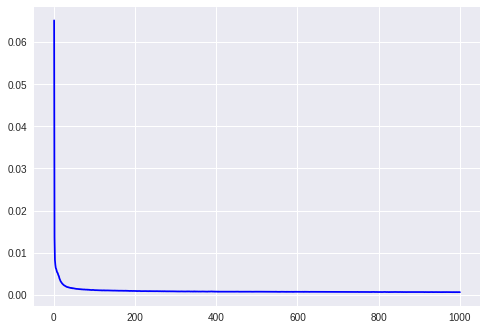

In [22]:
from Model import buildModel
from keras.models import load_model
import os
from DataProcess import load2d
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import LearningRateScheduler

if os.path.exists('CnnModel.h5'):
    model = load_model('CnnModel.h5')
else:
    model = buildModel()

batch_size = 128
epochs = 1000
verbose = 1

x_train, y_train = load2d(test=False, cols=True)

def mycallback(epoch):
  lr = K.get_value(model.optimizer.lr)
  if epoch % 100 == 0 and epoch != 0 and lr > 0.0001:
    base = 0.5
    K.set_value(model.optimizer.lr, lr * base)
  return K.get_value(model.optimizer.lr)

reduce_lr = LearningRateScheduler(mycallback)

#K.set_value(model.optimizer.lr, 0.01)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, callbacks = [reduce_lr])

history_dict = history.history
loss_values = history_dict['loss']

fig = plt.figure()

ax1 = fig.add_subplot(111)  # 一行一列一块
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, loss_values, 'b', label='Training Loss')
plt.show()

model.save('CnnModel.h5')


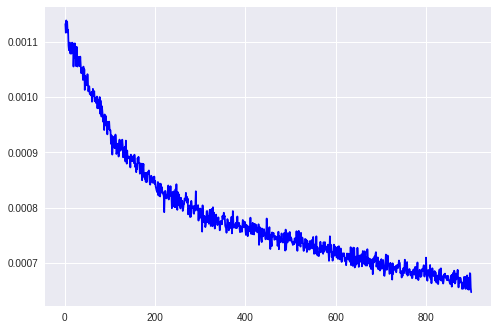

In [24]:
loss_values = loss_values[100:]
epochs = range(1, len(loss_values) + 1)
plt.clf()
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.show()